In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

# Mixed emotions AUs

In [2]:
path = "/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Mixed_emotions/"

# List all the .csv files in the folder
mix_emo_files = glob.glob(path + "/*.csv")

mix_emo_dfs = []
num_deleted = 0

for filename in mix_emo_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    

    # check the ratio of rows with confidence >= 0.98 to the total number of rows
    if len(df[df["confidence"]<0.98])/len(df) >= 0.15:
        # print the filename and delete the df variable
        #print(filename)
        del df
        num_deleted += 1
    else:
        # select confidence >= 0.98 & success = 1
        df = df.loc[(df["confidence"]>= 0.98) & (df["success"]== 1 ) ] 
        
        
        # keep only AU_c features
        df = df.filter(regex='AU.*_r')
        # add a column indicating videoname

        videoname = os.path.splitext(os.path.basename(filename))[0]

        # add a column indicating videoname
        df.insert(0, 'videoname', videoname)

            
        mix_emo_dfs.append(df)
        
print(f"{num_deleted} dataframes were deleted.")

print(len(mix_emo_dfs))

241 dataframes were deleted.
839


In [3]:
# Min-max normalization
# ratio
for df in mix_emo_dfs:
    cols_to_normalize_ratio = df.columns.difference(['videoname'])
    df[cols_to_normalize_ratio]=df[cols_to_normalize_ratio].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [4]:
# Compute basic statistics
# Mean, median and std
statistics_mix_df = pd.DataFrame(columns=['videoname'] + [f'mean_{col}' for col in mix_emo_dfs[0].columns if col != 'videoname'])

for df in mix_emo_dfs:
    
    videoname = df['videoname'].iloc[0]
    means = df.mean()
    #median = df.median()
    std = df.std()
    row = {'videoname': videoname}
    row.update({f'mean_{col}': means[col] for col in mix_emo_dfs[0].columns if col != 'videoname'})
    #row.update({f'median_{col}': median[col] for col in single_emo_dfs[0].columns if col != 'videoname'})
    row.update({f'std_{col}': std[col] for col in mix_emo_dfs[0].columns if col != 'videoname'})
    
    statistics_mix_df = statistics_mix_df.append(row, ignore_index=True)


/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_35868/2994847203.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means = df.mean()
/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_35868/2994847203.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = df.std()
/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_35868/2994847203.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_mix_df = statistics_mix_df.append(row, ignore_index=True)
/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_35868/2994847203.py:8: F

In [5]:
# fill missing values
statistics_mix_df = statistics_mix_df.fillna(0.0)

# exclude actor id
statistics_mix_df['videoname'] = statistics_mix_df['videoname'].apply(lambda x: '_'.join(x.split('_')[2:]))


In [6]:
# group rows by whether 'videoname' column contains emotion pairs
ang_fea_3070_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('ang_fea_3070'))
ang_fea_5050_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('ang_fea_5050'))
ang_fea_7030_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('ang_fea_7030'))

ang_disg_3070_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('ang_disg_3070'))
ang_disg_5050_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('ang_disg_5050'))
ang_disg_7030_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('ang_disg_7030'))

ang_hap_3070_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('ang_hap_3070'))
ang_hap_5050_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('ang_hap_5050'))
ang_hap_7030_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('ang_hap_7030'))


ang_sad_3070_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('ang_sad_3070'))
ang_sad_5050_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('ang_sad_5050'))
ang_sad_7030_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('ang_sad_7030'))

disg_fea_3070_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('disg_fea_3070'))
disg_fea_5050_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('disg_fea_5050'))
disg_fea_7030_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('disg_fea_7030'))

disg_hap_3070_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('disg_hap_3070'))
disg_hap_5050_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('disg_hap_5050'))
disg_hap_7030_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('disg_hap_7030'))

disg_sad_3070_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('disg_sad_3070'))
disg_sad_5050_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('disg_sad_5050'))
disg_sad_7030_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('disg_sad_7030'))

fea_hap_3070_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('fea_hap_3070'))
fea_hap_5050_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('fea_hap_5050'))
fea_hap_7030_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('fea_hap_7030'))

fea_sad_3070_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('fea_sad_3070'))
fea_sad_5050_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('fea_sad_5050'))
fea_sad_7030_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('fea_sad_7030'))

hap_sad_3070_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('hap_sad_3070'))
hap_sad_5050_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('hap_sad_5050'))
hap_sad_7030_rows = statistics_mix_df.groupby(statistics_mix_df['videoname'].str.contains('hap_sad_7030'))


# filter the groups to include only those where the 'videoname' column the slected emotion pairs
ang_fea_3070_groups = ang_fea_3070_rows.filter(lambda x: x['videoname'].str.contains('ang_fea_3070').any())
ang_fea_5050_groups = ang_fea_5050_rows.filter(lambda x: x['videoname'].str.contains('ang_fea_5050').any())
ang_fea_7030_groups = ang_fea_7030_rows.filter(lambda x: x['videoname'].str.contains('ang_fea_7030').any())

ang_disg_3070_groups = ang_disg_3070_rows.filter(lambda x: x['videoname'].str.contains('ang_disg_3070').any())
ang_disg_5050_groups = ang_disg_5050_rows.filter(lambda x: x['videoname'].str.contains('ang_disg_5050').any())
ang_disg_7030_groups = ang_disg_7030_rows.filter(lambda x: x['videoname'].str.contains('ang_disg_7030').any())

ang_hap_3070_groups = ang_hap_3070_rows.filter(lambda x: x['videoname'].str.contains('ang_hap_3070').any())
ang_hap_5050_groups = ang_hap_5050_rows.filter(lambda x: x['videoname'].str.contains('ang_hap_5050').any())
ang_hap_7030_groups = ang_hap_7030_rows.filter(lambda x: x['videoname'].str.contains('ang_hap_7030').any())

ang_sad_3070_groups = ang_sad_3070_rows.filter(lambda x: x['videoname'].str.contains('ang_sad_3070').any())
ang_sad_5050_groups = ang_sad_5050_rows.filter(lambda x: x['videoname'].str.contains('ang_sad_5050').any())
ang_sad_7030_groups = ang_sad_7030_rows.filter(lambda x: x['videoname'].str.contains('ang_sad_7030').any())

disg_fea_3070_groups = disg_fea_3070_rows.filter(lambda x: x['videoname'].str.contains('disg_fea_3070').any())
disg_fea_5050_groups = disg_fea_5050_rows.filter(lambda x: x['videoname'].str.contains('disg_fea_5050').any())
disg_fea_7030_groups = disg_fea_7030_rows.filter(lambda x: x['videoname'].str.contains('disg_fea_7030').any())


disg_hap_3070_groups = disg_hap_3070_rows.filter(lambda x: x['videoname'].str.contains('disg_hap_3070').any())
disg_hap_5050_groups = disg_hap_5050_rows.filter(lambda x: x['videoname'].str.contains('disg_hap_5050').any())
disg_hap_7030_groups = disg_hap_7030_rows.filter(lambda x: x['videoname'].str.contains('disg_hap_7030').any())


disg_sad_3070_groups = disg_sad_3070_rows.filter(lambda x: x['videoname'].str.contains('disg_sad_3070').any())
disg_sad_5050_groups = disg_sad_5050_rows.filter(lambda x: x['videoname'].str.contains('disg_sad_5050').any())
disg_sad_7030_groups = disg_sad_7030_rows.filter(lambda x: x['videoname'].str.contains('disg_sad_7030').any())

fea_hap_3070_groups = fea_hap_3070_rows.filter(lambda x: x['videoname'].str.contains('fea_hap_3070').any())
fea_hap_5050_groups = fea_hap_5050_rows.filter(lambda x: x['videoname'].str.contains('fea_hap_5050').any())
fea_hap_7030_groups = fea_hap_7030_rows.filter(lambda x: x['videoname'].str.contains('fea_hap_7030').any())

fea_sad_3070_groups = fea_sad_3070_rows.filter(lambda x: x['videoname'].str.contains('fea_sad_3070').any())
fea_sad_5050_groups = fea_sad_5050_rows.filter(lambda x: x['videoname'].str.contains('fea_sad_5050').any())
fea_sad_7030_groups = fea_sad_7030_rows.filter(lambda x: x['videoname'].str.contains('fea_sad_7030').any())

hap_sad_3070_groups = hap_sad_3070_rows.filter(lambda x: x['videoname'].str.contains('hap_sad_3070').any())
hap_sad_5050_groups = hap_sad_5050_rows.filter(lambda x: x['videoname'].str.contains('hap_sad_5050').any())
hap_sad_7030_groups = hap_sad_7030_rows.filter(lambda x: x['videoname'].str.contains('hap_sad_7030').any())


# Single emotions

In [7]:
single_path = "/Users/jiachenyao/Desktop/Thesis/OpenFace_data/Single_emotions/"

# List all the .csv files in the folder
single_emo_files = glob.glob(single_path + "/*.csv")

single_emo_dfs = []
single_num_deleted = 0

for filename in single_emo_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    

    # check the ratio of rows with confidence >= 0.98 to the total number of rows
    if len(df[df["confidence"]<0.98])/len(df) >= 0.15:
        # print the filename and delete the df variable
        #print(filename)
        del df
        single_num_deleted += 1
    else:
        # select confidence >= 0.98 & success = 1
        df = df.loc[(df["confidence"]>= 0.98) & (df["success"]== 1 ) ] 
        
        
        # keep only AU_c features
        df = df.filter(regex='AU.*_r')
        # add a column indicating videoname

        videoname = os.path.splitext(os.path.basename(filename))[0]

        # add a column indicating videoname
        df.insert(0, 'videoname', videoname)

            
        single_emo_dfs.append(df)
        
print(f"{single_num_deleted} dataframes were deleted.")

print(len(single_emo_dfs))

69 dataframes were deleted.
303


In [8]:
# Min-max normalization

for df in single_emo_dfs:
    cols_to_normalize = df.columns.difference(['videoname'])
    df[cols_to_normalize]=df[cols_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [9]:
# Compute basic statistics
# Mean, median and std
statistics_single_df = pd.DataFrame(columns=['videoname'] + [f'mean_{col}' for col in single_emo_dfs[0].columns if col != 'videoname'])

for df in single_emo_dfs:
    
    videoname = df['videoname'].iloc[0]
    means = df.mean()
    #median = df.median()
    std = df.std()
    row = {'videoname': videoname}
    row.update({f'mean_{col}': means[col] for col in single_emo_dfs[0].columns if col != 'videoname'})
    #row.update({f'median_{col}': median[col] for col in single_emo_dfs[0].columns if col != 'videoname'})
    row.update({f'std_{col}': std[col] for col in single_emo_dfs[0].columns if col != 'videoname'})
    
    statistics_single_df = statistics_single_df.append(row, ignore_index=True)



/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_35868/3930746737.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means = df.mean()
/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_35868/3930746737.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = df.std()
/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_35868/3930746737.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_single_df = statistics_single_df.append(row, ignore_index=True)
/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_35868/3930746737.p

In [10]:
# fill missing values with 0.0
statistics_single_df = statistics_single_df.fillna(0.0)

In [11]:
statistics_single_df["videoname"]=statistics_single_df["videoname"].apply(lambda x: '_'.join(x.split('_')[1:4]))

In [12]:
ang_1_rows = statistics_single_df.groupby(statistics_single_df['videoname'].str.contains('ang_v_1'))
ang_2_rows = statistics_single_df.groupby(statistics_single_df['videoname'].str.contains('ang_v_2'))
ang_3_rows = statistics_single_df.groupby(statistics_single_df['videoname'].str.contains('ang_v_3'))
ang_4_rows = statistics_single_df.groupby(statistics_single_df['videoname'].str.contains('ang_v_4'))

disg_1_rows = statistics_single_df.groupby(statistics_single_df['videoname'].str.contains('disg_v_1'))
disg_2_rows = statistics_single_df.groupby(statistics_single_df['videoname'].str.contains('disg_v_2'))
disg_3_rows = statistics_single_df.groupby(statistics_single_df['videoname'].str.contains('disg_v_3'))
disg_4_rows = statistics_single_df.groupby(statistics_single_df['videoname'].str.contains('disg_v_4'))

fea_1_rows = statistics_single_df.groupby(statistics_single_df['videoname'].str.contains('fea_v_1'))
fea_2_rows = statistics_single_df.groupby(statistics_single_df['videoname'].str.contains('fea_v_2'))
fea_3_rows = statistics_single_df.groupby(statistics_single_df['videoname'].str.contains('fea_v_3'))
fea_4_rows = statistics_single_df.groupby(statistics_single_df['videoname'].str.contains('fea_v_4'))

hap_1_rows = statistics_single_df.groupby(statistics_single_df['videoname'].str.contains('hap_v_1'))
hap_2_rows = statistics_single_df.groupby(statistics_single_df['videoname'].str.contains('hap_v_2'))
hap_3_rows = statistics_single_df.groupby(statistics_single_df['videoname'].str.contains('hap_v_3'))
hap_4_rows = statistics_single_df.groupby(statistics_single_df['videoname'].str.contains('hap_v_4'))

sad_1_rows = statistics_single_df.groupby(statistics_single_df['videoname'].str.contains('sad_v_1'))
sad_2_rows = statistics_single_df.groupby(statistics_single_df['videoname'].str.contains('sad_v_2'))
sad_3_rows = statistics_single_df.groupby(statistics_single_df['videoname'].str.contains('sad_v_3'))
sad_4_rows = statistics_single_df.groupby(statistics_single_df['videoname'].str.contains('sad_v_4'))


In [13]:
ang_1_groups = ang_1_rows.filter(lambda x: x['videoname'].str.contains('ang_v_1').any())
ang_2_groups = ang_2_rows.filter(lambda x: x['videoname'].str.contains('ang_v_2').any())
ang_3_groups = ang_3_rows.filter(lambda x: x['videoname'].str.contains('ang_v_3').any())
ang_4_groups = ang_4_rows.filter(lambda x: x['videoname'].str.contains('ang_v_4').any())

disg_1_groups = disg_1_rows.filter(lambda x: x['videoname'].str.contains('disg_v_1').any())
disg_2_groups = disg_2_rows.filter(lambda x: x['videoname'].str.contains('disg_v_2').any())
disg_3_groups = disg_3_rows.filter(lambda x: x['videoname'].str.contains('disg_v_3').any())
disg_4_groups = disg_4_rows.filter(lambda x: x['videoname'].str.contains('disg_v_4').any())

fea_1_groups = fea_1_rows.filter(lambda x: x['videoname'].str.contains('fea_v_1').any())
fea_2_groups = fea_2_rows.filter(lambda x: x['videoname'].str.contains('fea_v_2').any())
fea_3_groups = fea_3_rows.filter(lambda x: x['videoname'].str.contains('fea_v_3').any())
fea_4_groups = fea_4_rows.filter(lambda x: x['videoname'].str.contains('fea_v_4').any())

hap_1_groups = hap_1_rows.filter(lambda x: x['videoname'].str.contains('hap_v_1').any())
hap_2_groups = hap_2_rows.filter(lambda x: x['videoname'].str.contains('hap_v_2').any())
hap_3_groups = hap_3_rows.filter(lambda x: x['videoname'].str.contains('hap_v_3').any())
hap_4_groups = hap_4_rows.filter(lambda x: x['videoname'].str.contains('hap_v_4').any())

sad_1_groups = sad_1_rows.filter(lambda x: x['videoname'].str.contains('sad_v_1').any())
sad_2_groups = sad_2_rows.filter(lambda x: x['videoname'].str.contains('sad_v_2').any())
sad_3_groups = sad_3_rows.filter(lambda x: x['videoname'].str.contains('sad_v_3').any())
sad_4_groups = sad_4_rows.filter(lambda x: x['videoname'].str.contains('sad_v_4').any())


# Visualization

## Mean of each AU features of all mixed emotions and singles emotions

In [14]:
ang_disg_3070_mean = ang_disg_3070_groups.mean()
ang_disg_5050_mean = ang_disg_5050_groups.mean()
ang_disg_7030_mean = ang_disg_7030_groups.mean()

ang_fea_3070_mean = ang_fea_3070_groups.mean()
ang_fea_5050_mean = ang_fea_5050_groups.mean()
ang_fea_7030_mean = ang_fea_7030_groups.mean()

ang_sad_3070_mean = ang_sad_3070_groups.mean()
ang_sad_5050_mean = ang_sad_5050_groups.mean()
ang_sad_7030_mean = ang_sad_7030_groups.mean()

ang_hap_3070_mean = ang_hap_3070_groups.mean()
ang_hap_5050_mean = ang_hap_5050_groups.mean()
ang_hap_7030_mean = ang_hap_7030_groups.mean()

fea_hap_3070_mean = fea_hap_3070_groups.mean()
fea_hap_5050_mean = fea_hap_5050_groups.mean()
fea_hap_7030_mean = fea_hap_7030_groups.mean()

fea_sad_3070_mean = fea_sad_3070_groups.mean()
fea_sad_5050_mean = fea_sad_5050_groups.mean()
fea_sad_7030_mean = fea_sad_7030_groups.mean()

disg_fea_3070_mean = disg_fea_3070_groups.mean()
disg_fea_5050_mean = disg_fea_5050_groups.mean()
disg_fea_7030_mean = disg_fea_7030_groups.mean()

disg_sad_3070_mean = disg_sad_3070_groups.mean()
disg_sad_5050_mean = disg_sad_5050_groups.mean()
disg_sad_7030_mean = disg_sad_7030_groups.mean()

disg_hap_3070_mean = disg_hap_3070_groups.mean()
disg_hap_5050_mean = disg_hap_5050_groups.mean()
disg_hap_7030_mean = disg_hap_7030_groups.mean()

hap_sad_3070_mean = hap_sad_3070_groups.mean()
hap_sad_5050_mean = hap_sad_5050_groups.mean()
hap_sad_7030_mean = hap_sad_7030_groups.mean()


/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_35868/1831347667.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ang_disg_3070_mean = ang_disg_3070_groups.mean()
/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_35868/1831347667.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ang_disg_5050_mean = ang_disg_5050_groups.mean()
/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_35868/1831347667.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ang_disg

In [15]:
ang_1_mean = ang_1_groups.mean()
ang_2_mean = ang_2_groups.mean()
ang_3_mean = ang_3_groups.mean()
ang_4_mean = ang_4_groups.mean()

disg_1_mean = disg_1_groups.mean()
disg_2_mean = disg_2_groups.mean()
disg_3_mean = disg_3_groups.mean()
disg_4_mean = disg_4_groups.mean()

fea_1_mean = fea_1_groups.mean()
fea_2_mean = fea_2_groups.mean()
fea_3_mean = fea_3_groups.mean()
fea_4_mean = fea_4_groups.mean()

hap_1_mean = hap_1_groups.mean()
hap_2_mean = hap_2_groups.mean()
hap_3_mean = hap_3_groups.mean()
hap_4_mean = hap_4_groups.mean()

sad_1_mean = sad_1_groups.mean()
sad_2_mean = sad_2_groups.mean()
sad_3_mean = sad_3_groups.mean()
sad_4_mean = sad_4_groups.mean()

/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_35868/484856699.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ang_1_mean = ang_1_groups.mean()
/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_35868/484856699.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ang_2_mean = ang_2_groups.mean()
/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_35868/484856699.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ang_3_mean = ang_3_groups.mean()
/var/folde

In [16]:
ang_disg_df = pd.concat([ang_1_mean, ang_2_mean, ang_3_mean, ang_4_mean, ang_disg_7030_mean, ang_disg_5050_mean, ang_disg_3070_mean,
                         disg_1_mean, disg_2_mean, disg_3_mean, disg_4_mean], axis=1)
ang_disg_df =  ang_disg_df.T
ang_disg_df['emotion'] = ['ang_1', 'ang_2', 'ang_3', 'ang_4', 'ang_disg_7030',
                 'ang_disg_5050', 'ang_disg_3070', 'disg_1', 'disg_2',
                 'disg_3', 'disg_4']

ang_fea_df = pd.concat([ang_1_mean, ang_2_mean, ang_3_mean, ang_4_mean, ang_fea_7030_mean, 
                        ang_fea_5050_mean, ang_fea_3070_mean, fea_1_mean, fea_2_mean, fea_3_mean, fea_4_mean], axis=1)
ang_fea_df = ang_fea_df.T
ang_fea_df['emotion'] = ['ang_1', 'ang_2', 'ang_3', 'ang_4', 'ang_fea_7030',
                         'ang_fea_5050', 'ang_fea_3070', 'fea_1', 'fea_2', 'fea_3', 'fea_4']

ang_sad_df = pd.concat([ang_1_mean, ang_2_mean, ang_3_mean, ang_4_mean, ang_sad_7030_mean, 
                        ang_sad_5050_mean, ang_sad_3070_mean, sad_1_mean, sad_2_mean, sad_3_mean, sad_4_mean], axis=1)
ang_sad_df = ang_sad_df.T
ang_sad_df['emotion'] = ['ang_1', 'ang_2', 'ang_3', 'ang_4', 'ang_sad_7030',
                         'ang_sad_5050', 'ang_sad_3070', 'sad_1', 'sad_2', 'sad_3', 'sad_4']

ang_hap_df = pd.concat([ang_1_mean, ang_2_mean, ang_3_mean, ang_4_mean, ang_hap_7030_mean, 
                        ang_hap_5050_mean, ang_hap_3070_mean, hap_1_mean, hap_2_mean, hap_3_mean, hap_4_mean], axis=1)
ang_hap_df = ang_hap_df.T
ang_hap_df['emotion'] = ['ang_1', 'ang_2', 'ang_3', 'ang_4', 'ang_hap_7030',
                         'ang_hap_5050', 'ang_hap_3070', 'hap_1', 'hap_2', 'hap_3', 'hap_4']

disg_fea_df = pd.concat([disg_1_mean, disg_2_mean, disg_3_mean, disg_4_mean, 
                         disg_fea_7030_mean, disg_fea_5050_mean, disg_fea_3070_mean, fea_1_mean, fea_2_mean, fea_3_mean, fea_4_mean], axis=1)
disg_fea_df = disg_fea_df.T
disg_fea_df['emotion'] = ['disg_1', 'disg_2', 'disg_3', 'disg_4', 'disg_fea_7030',
                          'disg_fea_5050', 'disg_fea_3070', 'fea_1', 'fea_2', 'fea_3', 'fea_4']

disg_sad_df = pd.concat([disg_1_mean, disg_2_mean, disg_3_mean, disg_4_mean, 
                         disg_sad_7030_mean, disg_sad_5050_mean, disg_sad_3070_mean, sad_1_mean, sad_2_mean, sad_3_mean, sad_4_mean], axis=1)
disg_sad_df = disg_sad_df.T
disg_sad_df['emotion'] = ['disg_1', 'disg_2', 'disg_3', 'disg_4', 'disg_sad_7030',
                          'disg_sad_5050', 'disg_sad_3070', 'sad_1', 'sad_2', 'sad_3', 'sad_4']

disg_hap_df = pd.concat([disg_1_mean, disg_2_mean, disg_3_mean, disg_4_mean, 
                         disg_hap_7030_mean, disg_hap_5050_mean, disg_hap_3070_mean, hap_1_mean, hap_2_mean, hap_3_mean, hap_4_mean], axis=1)
disg_hap_df = disg_hap_df.T
disg_hap_df['emotion'] = ['disg_1', 'disg_2', 'disg_3', 'disg_4', 'disg_hap_7030',
                          'disg_hap_5050', 'disg_hap_3070', 'hap_1', 'hap_2', 'hap_3', 'hap_4']

fea_sad_df = pd.concat([fea_1_mean, fea_2_mean, fea_3_mean, fea_4_mean, fea_sad_7030_mean, 
                        fea_sad_5050_mean, fea_sad_3070_mean, sad_1_mean, sad_2_mean, sad_3_mean, sad_4_mean], axis=1)
fea_sad_df = fea_sad_df.T
fea_sad_df['emotion'] = ['fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_sad_7030',
                         'fea_sad_5050', 'fea_sad_3070', 'sad_1', 'sad_2', 'sad_3', 'sad_4']

fea_hap_df = pd.concat([fea_1_mean, fea_2_mean, fea_3_mean, fea_4_mean, fea_hap_7030_mean, 
                        fea_hap_5050_mean, fea_hap_3070_mean, hap_1_mean, hap_2_mean, hap_3_mean, hap_4_mean], axis=1)
fea_hap_df = fea_hap_df.T
fea_hap_df['emotion'] = ['fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_hap_7030',
                         'fea_hap_5050', 'fea_hap_3070', 'hap_1', 'hap_2', 'hap_3', 'hap_4']

hap_sad_df = pd.concat([hap_1_mean, hap_2_mean, hap_3_mean, hap_4_mean, hap_sad_7030_mean, 
                        hap_sad_5050_mean, hap_sad_3070_mean, sad_1_mean, sad_2_mean, sad_3_mean, sad_4_mean], axis=1)
hap_sad_df = hap_sad_df.T
hap_sad_df['emotion'] = ['hap_1', 'hap_2', 'hap_3', 'hap_4', 'hap_sad_7030','hap_sad_5050', 
                         'hap_sad_3070', 'sad_1', 'sad_2', 'sad_3', 'sad_4']

/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_35868/287996663.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ang_disg_df['emotion'], rotation=45)
/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_35868/287996663.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ang_hap_df['emotion'], rotation=45)
/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_35868/287996663.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(ang_sad_df['emotion'], rotation=45)
/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_35868/287996663.py:85: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(ang_fea_df['emotion'], rotation=45)
/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_35868/287996663.py:92: UserWarning: FixedFormatter should only be used together 

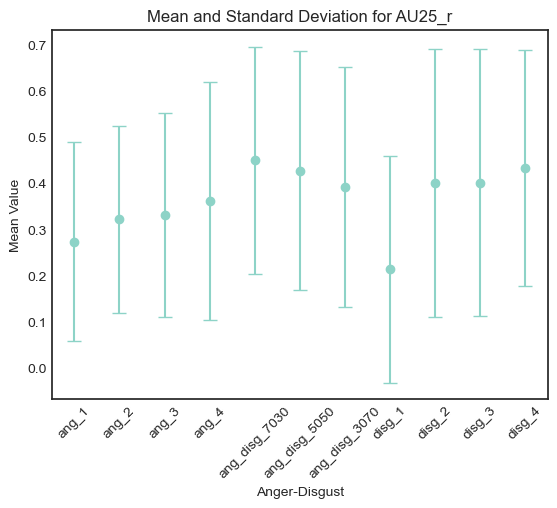

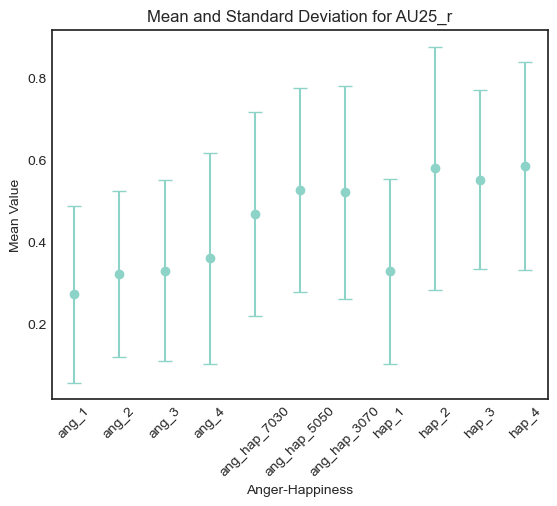

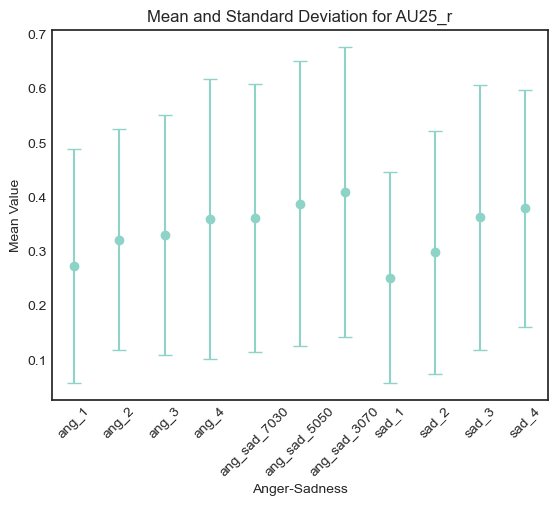

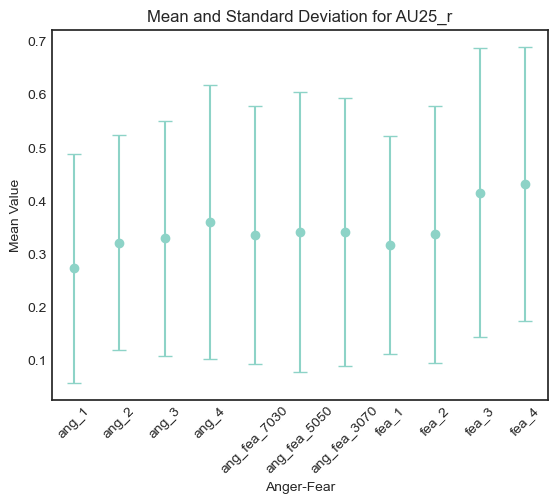

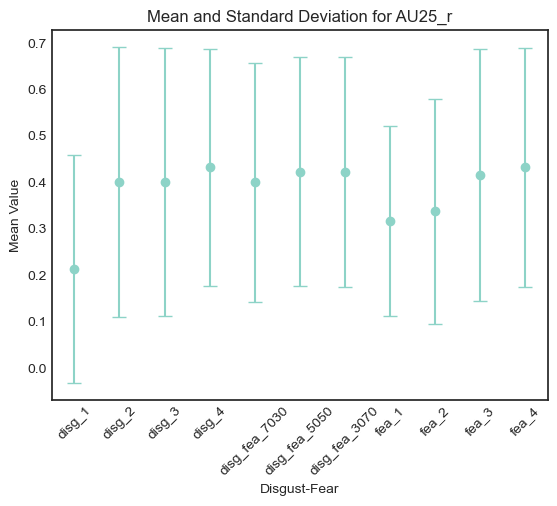

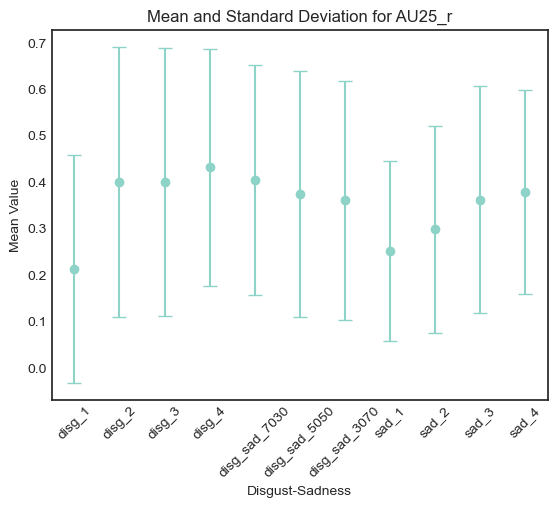

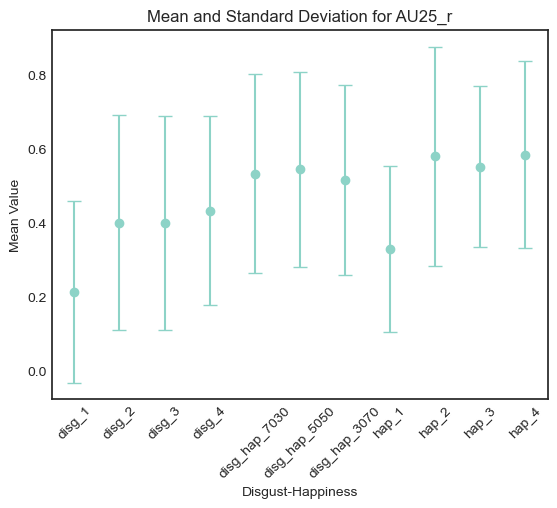

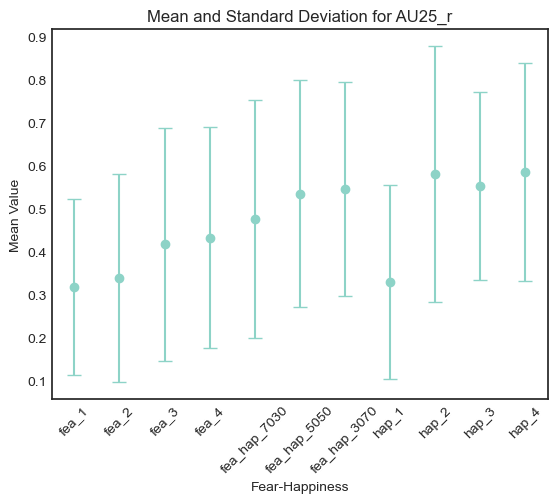

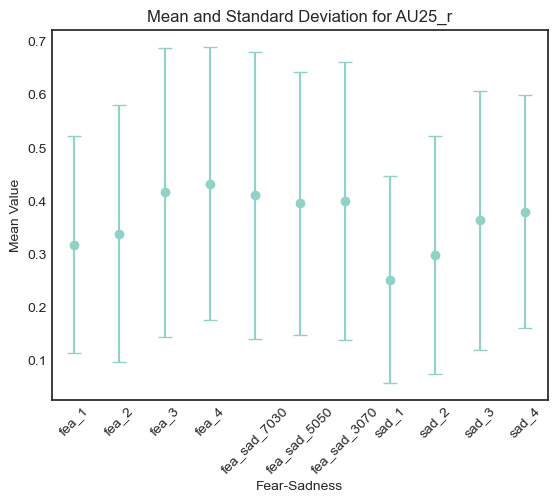

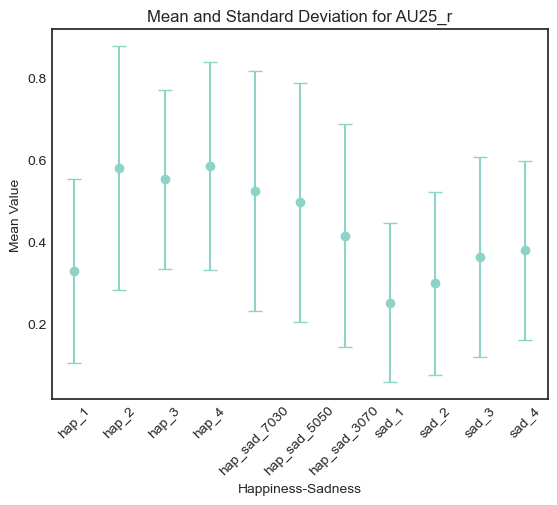

SyntaxError: 'break' outside loop (287996663.py, line 134)

In [28]:
# Make plots

# loop through all AUs

# select the facial action unit to plot
AUs = ['AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r',  
        'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 
        'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r']

# extract mean and std columns for the selected facial action unit
au = AUs[14]
mean_col = "mean_" + au
std_col = "std_" + au

ang_disg_mean_values = ang_disg_df[mean_col].tolist()
ang_disg_std_values = ang_disg_df[std_col].tolist()

ang_sad_mean_values = ang_sad_df[mean_col].tolist()
ang_sad_std_values = ang_sad_df[std_col].tolist()

ang_hap_mean_values = ang_hap_df[mean_col].tolist()
ang_hap_std_values = ang_hap_df[std_col].tolist()

ang_fea_mean_values = ang_fea_df[mean_col].tolist()
ang_fea_std_values = ang_fea_df[std_col].tolist()  

disg_fea_mean_values = disg_fea_df[mean_col].tolist()
disg_fea_std_values = disg_fea_df[std_col].tolist()

disg_sad_mean_values = disg_sad_df[mean_col].tolist()
disg_sad_std_values = disg_sad_df[std_col].tolist()

disg_hap_mean_values = disg_hap_df[mean_col].tolist()
disg_hap_std_values = disg_hap_df[std_col].tolist()

fea_sad_mean_values = fea_sad_df[mean_col].tolist()
fea_sad_std_values = fea_sad_df[std_col].tolist()

fea_hap_mean_values = fea_hap_df[mean_col].tolist()
fea_hap_std_values = fea_hap_df[std_col].tolist()

hap_sad_mean_values = hap_sad_df[mean_col].tolist()
hap_sad_std_values = hap_sad_df[std_col].tolist()


# extract the emotion labels
ang_disg_emotions = ang_disg_df['emotion'].tolist()
ang_sad_emotions = ang_sad_df['emotion'].tolist()
ang_hap_emotions = ang_hap_df['emotion'].tolist()
ang_fea_emotions = ang_fea_df['emotion'].tolist()
disg_fea_emotions = disg_fea_df['emotion'].tolist()
disg_sad_emotions = disg_sad_df['emotion'].tolist()
disg_hap_emotions = disg_hap_df['emotion'].tolist()
fea_sad_emotions = fea_sad_df['emotion'].tolist()
fea_hap_emotions = fea_hap_df['emotion'].tolist()
hap_sad_emotions = hap_sad_df['emotion'].tolist()

# create the plot
plt.style.use('seaborn-white')
fig1, ax1 = plt.subplots()
ax1.errorbar(ang_disg_emotions, ang_disg_mean_values, yerr=ang_disg_std_values, fmt='o', capsize=5)
ax1.set_title(f'Mean and Standard Deviation for {au}')
ax1.set_xlabel('Anger-Disgust')
ax1.set_xticklabels(ang_disg_df['emotion'], rotation=45)
ax1.set_ylabel('Mean Value')

fig2, ax2 = plt.subplots()
ax2.errorbar(ang_hap_emotions, ang_hap_mean_values, yerr=ang_hap_std_values, fmt='o', capsize=5)
ax2.set_title(f'Mean and Standard Deviation for {au}')
ax2.set_xlabel('Anger-Happiness')
ax2.set_xticklabels(ang_hap_df['emotion'], rotation=45)
ax2.set_ylabel('Mean Value')

fig3, ax3 = plt.subplots()
ax3.errorbar(ang_sad_emotions, ang_sad_mean_values, yerr=ang_sad_std_values, fmt='o', capsize=5)
ax3.set_title(f'Mean and Standard Deviation for {au}')
ax3.set_xlabel('Anger-Sadness')
ax3.set_xticklabels(ang_sad_df['emotion'], rotation=45)
ax3.set_ylabel('Mean Value')

fig4, ax4 = plt.subplots()
ax4.errorbar(ang_fea_emotions, ang_fea_mean_values, yerr=ang_fea_std_values, fmt='o', capsize=5)
ax4.set_title(f'Mean and Standard Deviation for {au}')
ax4.set_xlabel('Anger-Fear')
ax4.set_xticklabels(ang_fea_df['emotion'], rotation=45)
ax4.set_ylabel('Mean Value')

fig5, ax5 = plt.subplots()
ax5.errorbar(disg_fea_emotions, disg_fea_mean_values, yerr=disg_fea_std_values, fmt='o', capsize=5)
ax5.set_title(f'Mean and Standard Deviation for {au}')
ax5.set_xlabel('Disgust-Fear')
ax5.set_xticklabels(disg_fea_df['emotion'], rotation=45)
ax5.set_ylabel('Mean Value')


fig6, ax6 = plt.subplots()
ax6.errorbar(disg_sad_emotions, disg_sad_mean_values, yerr=disg_sad_std_values, fmt='o', capsize=5)
ax6.set_title(f'Mean and Standard Deviation for {au}')
ax6.set_xlabel('Disgust-Sadness')
ax6.set_xticklabels(disg_sad_df['emotion'], rotation=45)
ax6.set_ylabel('Mean Value')

fig7, ax7 = plt.subplots()
ax7.errorbar(disg_hap_emotions, disg_hap_mean_values, yerr=disg_hap_std_values, fmt='o', capsize=5)
ax7.set_title(f'Mean and Standard Deviation for {au}')
ax7.set_xlabel('Disgust-Happiness')
ax7.set_xticklabels(disg_hap_df['emotion'], rotation=45)
ax7.set_ylabel('Mean Value')

fig8, ax8 = plt.subplots()
ax8.errorbar(fea_hap_emotions, fea_hap_mean_values, yerr=fea_hap_std_values, fmt='o', capsize=5)
ax8.set_title(f'Mean and Standard Deviation for {au}')
ax8.set_xlabel('Fear-Happiness')
ax8.set_xticklabels(fea_hap_df['emotion'], rotation=45)
ax8.set_ylabel('Mean Value')

fig9, ax9 = plt.subplots()
ax9.errorbar(fea_sad_emotions, fea_sad_mean_values, yerr=fea_sad_std_values, fmt='o', capsize=5)
ax9.set_title(f'Mean and Standard Deviation for {au}')
ax9.set_xlabel('Fear-Sadness')
ax9.set_xticklabels(fea_sad_df['emotion'], rotation=45)
ax9.set_ylabel('Mean Value')

fig10, ax10 = plt.subplots()
ax10.errorbar(hap_sad_emotions, hap_sad_mean_values, yerr=hap_sad_std_values, fmt='o', capsize=5)
ax10.set_title(f'Mean and Standard Deviation for {au}')
ax10.set_xlabel('Happiness-Sadness')
ax10.set_xticklabels(hap_sad_df['emotion'], rotation=45)
ax10.set_ylabel('Mean Value')


# display the plot
plt.show()
break

In [ ]:
disg_df = pd.concat([disg_1_mean, disg_2_mean, disg_3_mean, disg_4_mean], axis=1)
disg_df = disg_df.T
disg_df['emotion'] = ['disg_1', 'disg_2', 'disg_3', 'disg_4']

fea_df = pd.concat([fea_1_mean, fea_2_mean, fea_3_mean, fea_4_mean], axis=1)
fea_df = fea_df.T
fea_df['emotion'] = ['fea_1', 'fea_2', 'fea_3', 'fea_4']

hap_df = pd.concat([hap_1_mean, hap_2_mean, hap_3_mean, hap_4_mean], axis=1)
hap_df = hap_df.T
hap_df['emotion'] = ['hap_1', 'hap_2', 'hap_3', 'hap_4']

sad_df = pd.concat([sad_1_mean, sad_2_mean, sad_3_mean, sad_4_mean], axis=1)
sad_df = sad_df.T
sad_df['emotion'] = ['sad_1', 'sad_2', 'sad_3', 'sad_4']

ang_df = pd.concat([ang_1_mean, ang_2_mean, ang_3_mean, ang_4_mean], axis=1)
ang_df = ang_df.T
ang_df['emotion'] = ['ang_1', 'ang_2', 'ang_3', 'ang_4']

single_df = pd.concat([ang_df, hap_df, sad_df, fea_df, disg_df], axis=0)

/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_91199/1607321238.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(single_df['emotion'], rotation=45)


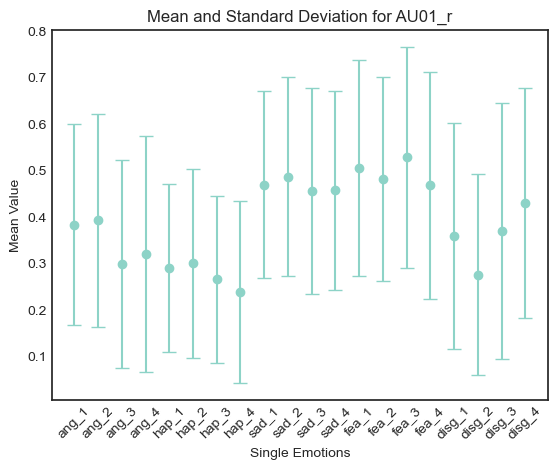

/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_91199/1607321238.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(single_df['emotion'], rotation=45)


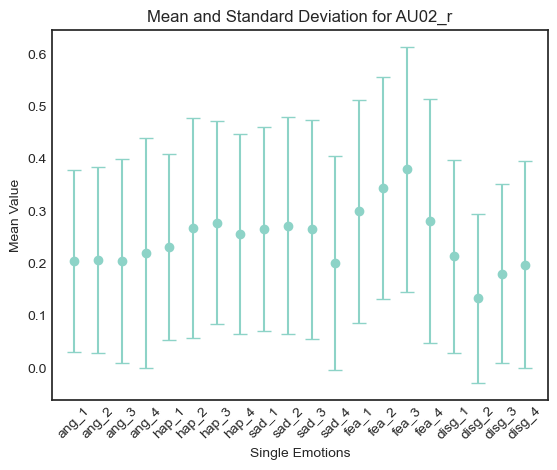

/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_91199/1607321238.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(single_df['emotion'], rotation=45)


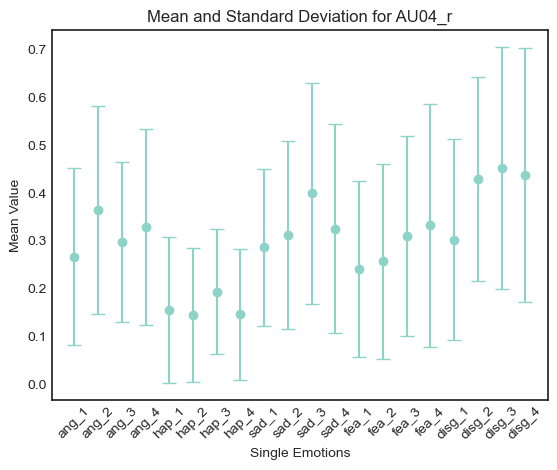

/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_91199/1607321238.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(single_df['emotion'], rotation=45)


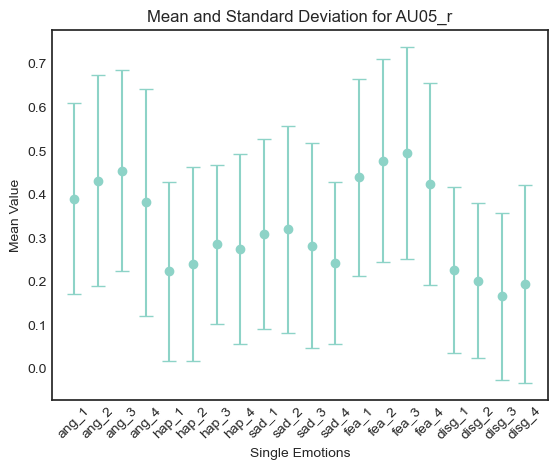

/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_91199/1607321238.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(single_df['emotion'], rotation=45)


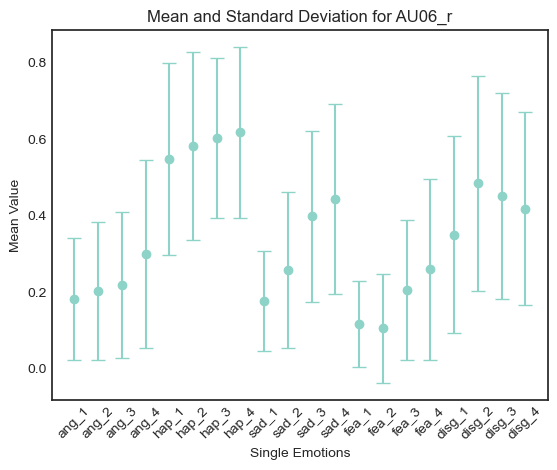

/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_91199/1607321238.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(single_df['emotion'], rotation=45)


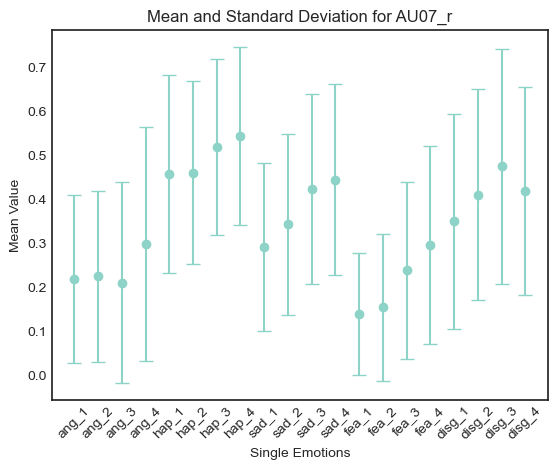

/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_91199/1607321238.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(single_df['emotion'], rotation=45)


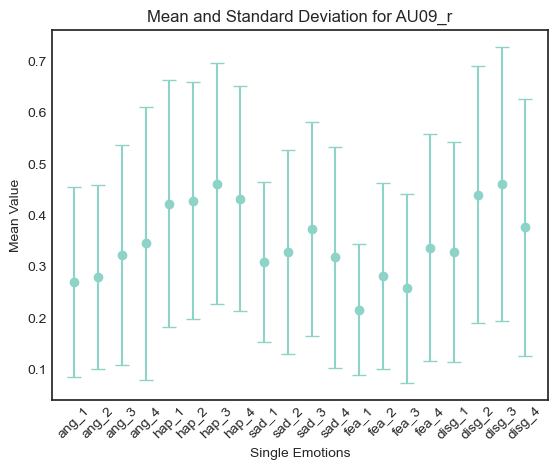

/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_91199/1607321238.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(single_df['emotion'], rotation=45)


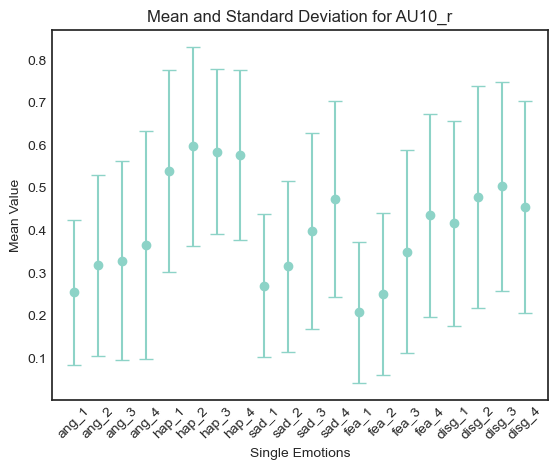

/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_91199/1607321238.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(single_df['emotion'], rotation=45)


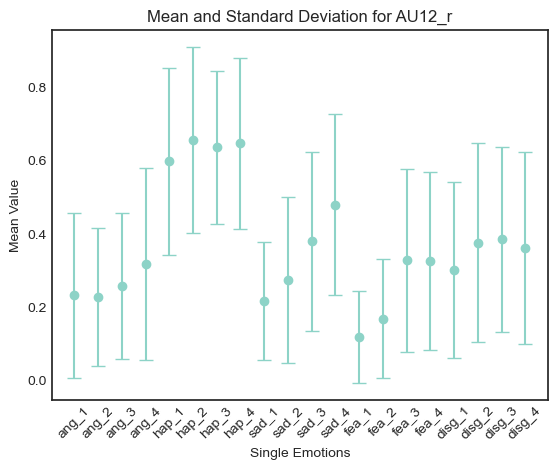

/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_91199/1607321238.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(single_df['emotion'], rotation=45)


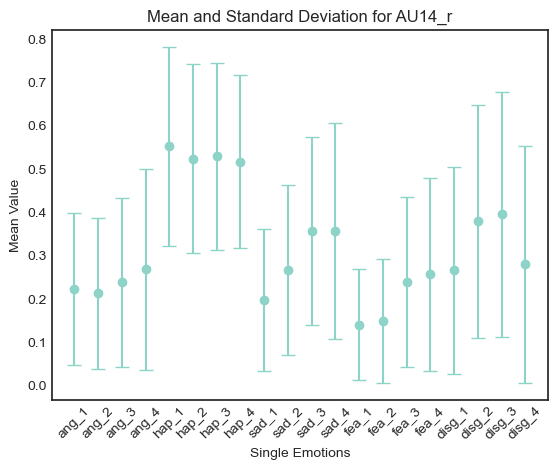

/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_91199/1607321238.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(single_df['emotion'], rotation=45)


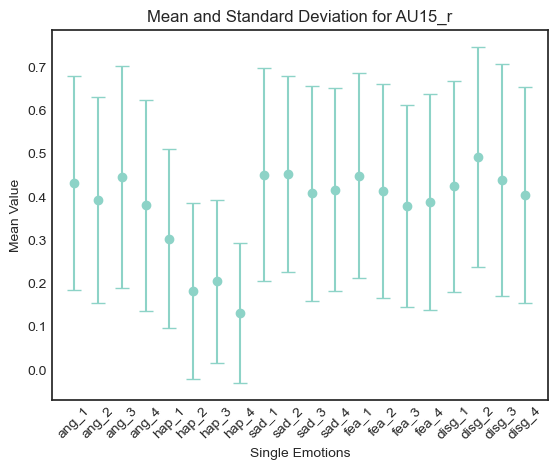

/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_91199/1607321238.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(single_df['emotion'], rotation=45)


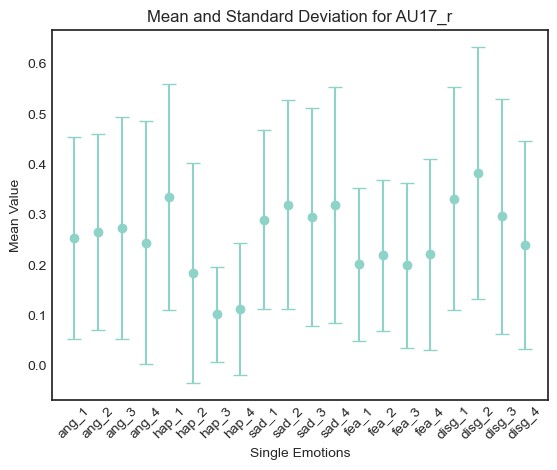

/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_91199/1607321238.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(single_df['emotion'], rotation=45)


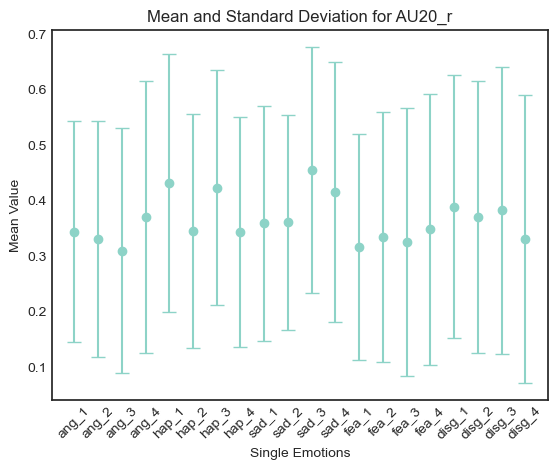

/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_91199/1607321238.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(single_df['emotion'], rotation=45)


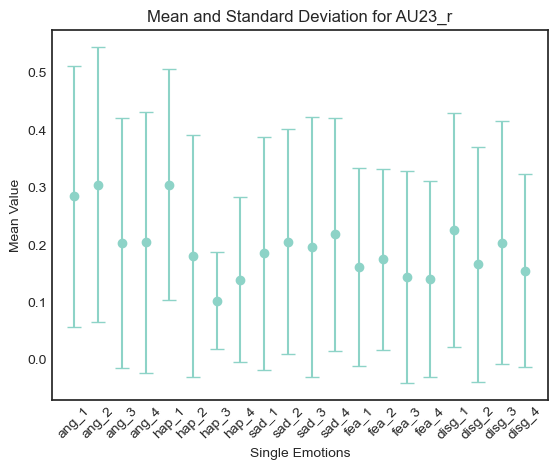

/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_91199/1607321238.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(single_df['emotion'], rotation=45)


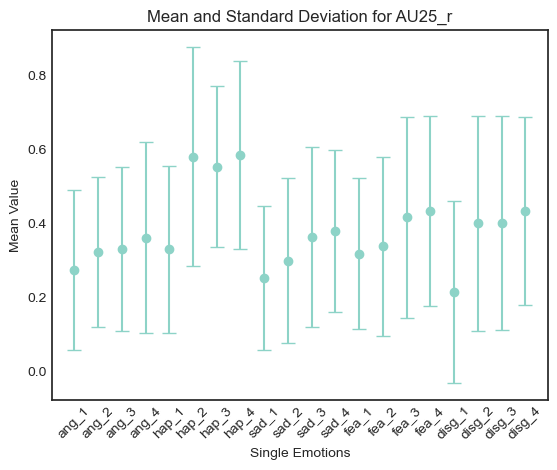

/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_91199/1607321238.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(single_df['emotion'], rotation=45)


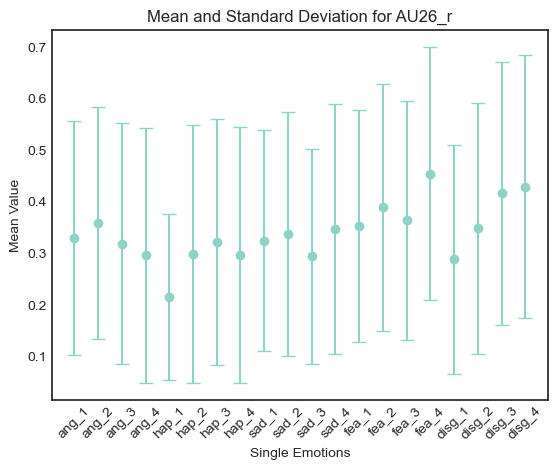

/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_91199/1607321238.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(single_df['emotion'], rotation=45)


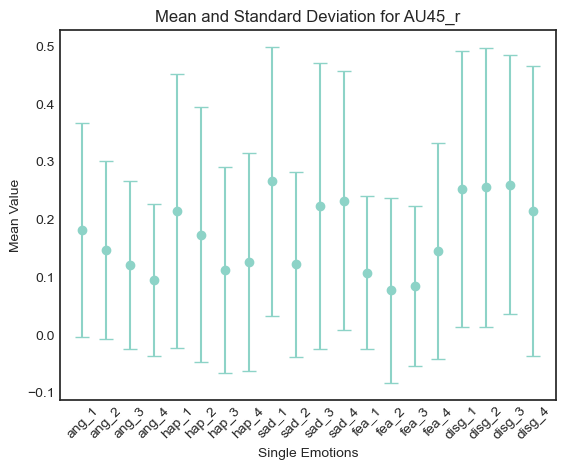

In [ ]:
for au in AUs:

    mean_col = "mean_" + au
    std_col = "std_" + au

    single_mean_values = single_df[mean_col].tolist()
    single_std_values = single_df[std_col].tolist()

    single_emotions = single_df['emotion'].tolist()

    plt.style.use('seaborn-white')
    fig1, ax1 = plt.subplots()
    ax1.errorbar(single_emotions, single_mean_values, yerr=single_std_values, fmt='o', capsize=5)
    ax1.set_title(f'Mean and Standard Deviation for {au}')
    ax1.set_xlabel('Single Emotions')
    ax1.set_xticklabels(single_df['emotion'], rotation=45)
    ax1.set_ylabel('Mean Value')

    plt.show()

